<a href="https://colab.research.google.com/github/RPJ123/pulmonary-embolism/blob/main/PeModelTrainingmaxacc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import seaborn as sns
from collections import Counter

In [ ]:
path = 'PE_dataset/train'

images = []
labels = []

for dataset_path in tqdm(os.listdir(path)):
    class_path = os.path.join(path, dataset_path)
    class_name=dataset_path
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        image = cv2.imread(image_path)
        image=np.array(image)
        labels.append(class_name)
        images.append(image)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:13<00:00,  6.95s/it]


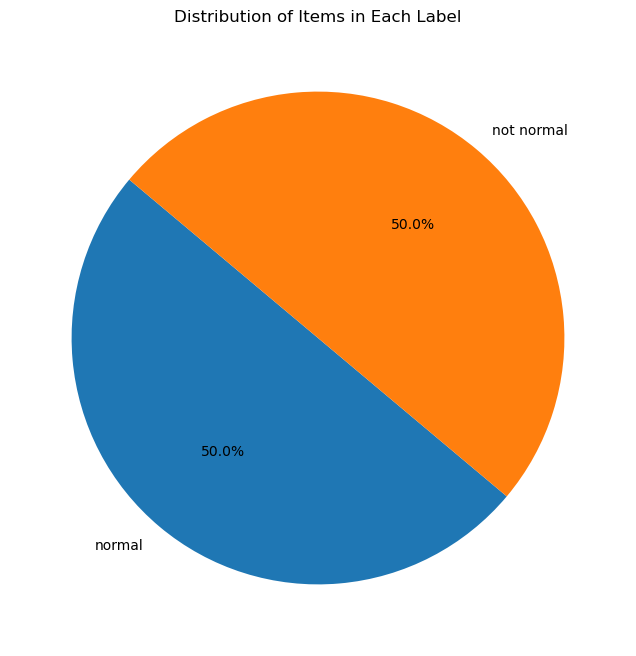

In [ ]:
label_counts = Counter(labels)

label = list(label_counts.keys())
counts = list(label_counts.values())

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=label, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Items in Each Label")
plt.show()

In [ ]:
images_train = np.array(images)
labels_train = np.array(labels)

images_train=images_train/255

In [ ]:
np.shape(labels_train)

(8000,)

In [ ]:
y_train=[]
for i in labels_train:
    if i=="normal":
        y_train.append(0)
    else:
        y_train.append(1)

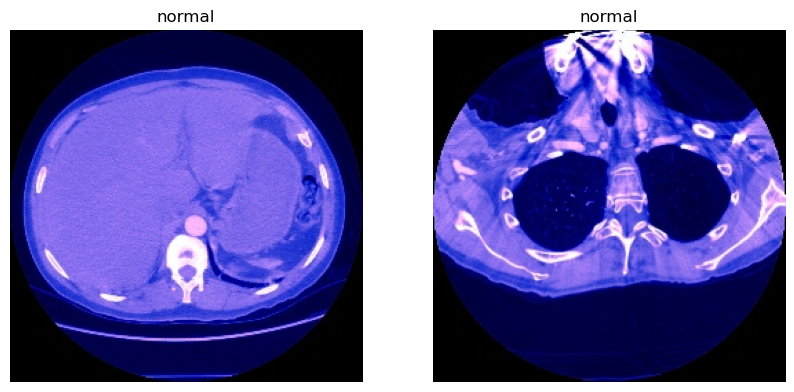

In [ ]:
plt.figure(figsize=(10, 5))
x=[0,3000]
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(images_train[x[i]])
    plt.title(labels_train[x[i]])
    plt.axis('off')
plt.show()

In [ ]:
path = 'PE_dataset/val'

images = []
labels = []

for dataset_path in tqdm(os.listdir(path)):
    class_path = os.path.join(path, dataset_path)
    class_name=dataset_path
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        image = cv2.imread(image_path)
        image=np.array(image)
        labels.append(class_name)
        images.append(image)

images_test = np.array(images)
labels_test = np.array(labels)

images_test=images_test/255

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.74s/it]


In [ ]:
np.shape(images_test)

(2000, 256, 256, 3)

In [ ]:
y_test=[]
for i in labels_test:
    if i=="normal":
        y_test.append(0)
    else:
        y_test.append(1)

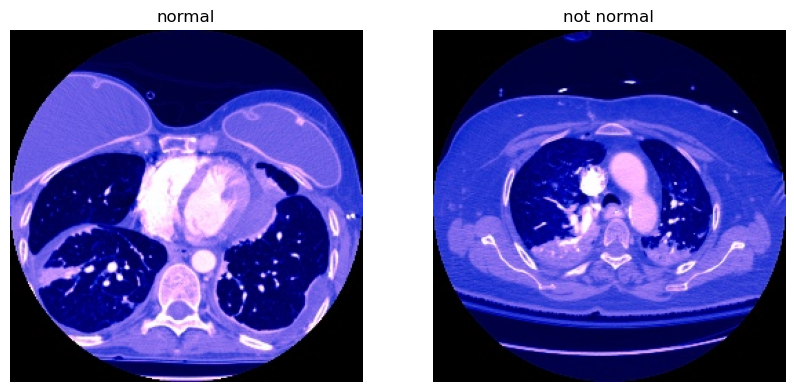

In [ ]:
plt.figure(figsize=(10, 5))
x=[0,1500]
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(images_test[x[i]])
    plt.title(labels_test[x[i]])
    plt.axis('off')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [ ]:
classifier = Sequential()

classifier.add(Convolution2D(32, (3, 3), input_shape=(256, 256, 3), padding='same',activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
classifier.add(Convolution2D(64, (3, 3), padding='same',activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
classifier.add(Flatten())
classifier.add(Dense(units=96, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=32, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=1, activation='sigmoid')) # softmax for more than 2

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # categorical_crossentropy for more than 2

classifier.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 262144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 96)                  │      25,165,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,188,449 (96.09 MB)

 Trainable params: 25,188,449 (96.09 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
filepath = 'model_final.keras'
checkpoint = ModelCheckpoint(filepath=filepath,monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
ES = EarlyStopping(monitor='val_accuracy', patience=15)

In [ ]:
EPOCHS = 500
callbacks = [checkpoint,ES]
history=classifier.fit( training_set,validation_data=test_set,epochs=EPOCHS,callbacks=callbacks)

Epoch 1/500


C:\Users\Vyshnav\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 656ms/step - accuracy: 0.5715 - loss: 0.8227
Epoch 1: val_accuracy improved from -inf to 0.74100, saving model to model_final.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 205s 806ms/step - accuracy: 0.5718 - loss: 0.8219 - val_accuracy: 0.7410 - val_loss: 0.5124
Epoch 2/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 756ms/step - accuracy: 0.7523 - loss: 0.5073
Epoch 2: val_accuracy improved from 0.74100 to 0.81900, saving model to model_final.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 224s 884ms/step - accuracy: 0.7524 - loss: 0.5072 - val_accuracy: 0.8190 - val_loss: 0.3902
Epoch 3/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 765ms/step - accuracy: 0.7977 - loss: 0.4418
Epoch 3: val_accuracy improved from 0.81900 to 0.85850, saving model to model_final.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 228s 901ms/step - accuracy: 0.7978 - loss: 0.4417 - val_accuracy: 0.8585 - val_loss: 0.3304
Epoch 4/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 674ms/step - accuracy: 0.8147 - loss: 0.3701
Epoch 4: val_accuracy impr

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D,Flatten,Dropout

import numpy as np
import pandas as pd

In [ ]:
# Generating images for the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                  )

training_set = train_datagen.flow_from_directory('PE_dataset/train',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'binary'
                                                )

test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory('PE_dataset/val',
                                            target_size = (256, 256),
                                            batch_size = 1,
                                            class_mode = 'binary')


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
